In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier

our dataset here https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification?resource=download

In [ ]:
data = pd.read_csv("train.csv")
X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
bestf = SelectKBest(score_func=chi2, k=10) #we use the SelectKBest() to find K value
fit = bestf.fit(X,y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

In [ ]:
corr = data.corr()["ram"].sort_values(ascending=False)[1:]

In [ ]:
featureScores = pd.concat([df_columns,df_scores],axis=1)
featureScores.columns = ['Spaces','Score']

In [ ]:
print(featureScores.nlargest(5,'Score'))

           Spaces          Score
13            ram  931267.519053
11      px_height   17363.569536
0   battery_power   14129.866576
12       px_width    9810.586750
8       mobile_wt      95.972863


In [ ]:
train_model = ExtraTreesClassifier()
train_model.fit(X,y)
print(train_model.feature_importances_)

[0.06054562 0.02095386 0.03306468 0.01932331 0.03422721 0.01672392
 0.03566313 0.03266654 0.03793422 0.03311155 0.03397292 0.04627012
 0.04975309 0.38856485 0.03458647 0.0338042  0.0358912  0.01456228
 0.01860965 0.01977118]


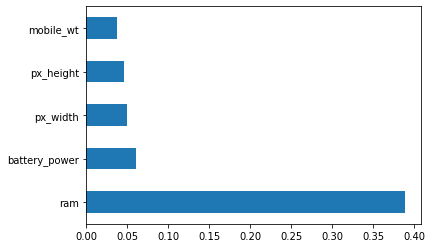

In [ ]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(train_model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()